# Research for the online store

Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.
In the present research we will prioritize these hypotheses, launch an A/B test, and analyze the results.

## Step 1. General information and pre-processing


In [1]:
import pandas as pd
import numpy as np 
import math as mt
from math import factorial
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
from collections import Counter
import seaborn as sns
import warnings
from datetime import date, timedelta
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import random
import scipy.stats as stats
from pylab import *

In [2]:
#Let’s read them from the csv and check what we have there.
#1st table from the csv file will be saved as hypotheses_us:

hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses_us.info()
display(hypotheses_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [3]:
orders_us = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders_us['date'] = orders_us['date'].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [4]:
#2nd table from the csv file will be saved as orders_us:

orders_us = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders_us['date'] = pd.to_datetime(orders_us['date'], format="%Y-%m-%d")
orders_us.info()
display(orders_us.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [5]:
#let's check if there are users in both groups A and B and filter them out
user_group = orders_us.groupby('visitorId').agg({'group':'nunique'})
user_group = user_group.query('group <= 1')
#user_group
orders_filtered = orders_us[orders_us['visitorId'].isin(user_group.index)]
#orders_filtered


In [6]:
#let's see how many users and orders we have in our sets
print('filtered data without users in A and B group simultaneously ')
print('A group unique users sample size:', orders_filtered.query('group == "A"')['visitorId'].nunique())
print('B group unique users sample size:', orders_filtered.query('group == "B"')['visitorId'].nunique())
print()
print('A group sample size:', orders_filtered.query('group == "A"')['transactionId'].nunique())
print('B group sample size:', orders_filtered.query('group == "B"')['transactionId'].nunique())


filtered data without users in A and B group simultaneously 
A group unique users sample size: 445
B group unique users sample size: 528

A group sample size: 468
B group sample size: 548


In [7]:
print('unfiltered data')
print('A group unique users sample size:', orders_us.query('group == "A"')['visitorId'].nunique())
print('B group unique users sample size:', orders_us.query('group == "B"')['visitorId'].nunique())
print()
print('A group sample size:', orders_us.query('group == "A"')['transactionId'].nunique())
print('B group sample size:', orders_us.query('group == "B"')['transactionId'].nunique())


unfiltered data
A group unique users sample size: 503
B group unique users sample size: 586

A group sample size: 557
B group sample size: 640


In [8]:
#3rd table from the csv file will be saved as visits_us:

visits_us = pd.read_csv('/datasets/visits_us.csv', sep=',')
visits_us['date'] = pd.to_datetime(visits_us['date'], format="%Y-%m-%d")
visits_us.info()
display(visits_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Conclusion

There are 3 data sets. Every data set is saved as a variable:

**hypotheses_us**

Its total length is 9 rows, every row represents one Hypotheses and its characteristics in columns: Hypotheses — brief descriptions of the hypotheses; Reach — user reach, on a scale of one to ten; Impact — impact on users, on a scale of one to ten; Confidence — confidence in the hypothesis, on a scale of one to ten; Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

**orders_us**

Its total length is 1197 rows, every row represents one order and its characteristics in columns: transactionId — order identifier; visitorId — identifier of the user who placed the order; date — of the order; revenue — from the order; group — the A/B test group that the user belongs to.

**visits_us**

Its total length is 62 rows, every row represents one visit and its characteristics in columns: date — date; group — A/B test group; visits — the number of visits on the date specified in the A/B test group specified.

    
As part of out analysis, in the order_us table, we made sure each visitor belongs to 1 group and in filtered data we got the following:
filtered data
- A group *unique users* sample size: 445
- B group *unique users* sample size: 528
- A group sample size: 468
- B group sample size: 548

While initially we had this:
unfiltered data
- A group *unique users sample* size: 503
- B group *unique users sample* size: 586
- A group sample size: 557
- B group sample size: 640

Note: we are aware that aligned A and B distributions to one size, as samples of equal size, increases the power of the test, thus accuracy. It was decided not to use it as we have pretty large data set and distributions are more or less the same.

## Step 2. Analysis 
## Part 1. Prioritizing Hypotheses

As we mentioned earlier, hypotheses_us contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. It's a common situation: testing a hypothesis will cost a lot of money, but our resources are limited. So we need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, the hypotheses formulated in the table have to be prioritized. Below will analyze those hypotheses with the most common methods.

### 1.1. ICE framework to prioritize hypotheses (sorted in descending order of priority)

In [9]:
#Impact, confidence, effort/ease (ICE) is one of the most popular ways of prioritizing problems

hypotheses_us['ICE'] = hypotheses_us['Impact'] * hypotheses_us['Confidence'] / hypotheses_us['Effort']
print((hypotheses_us[['Hypothesis','ICE']]).sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### 1.2. RICE framework to prioritize hypotheses (sorted in descending order of priority)

In [10]:
#RICE has additional component vs ICE: Reach — how many users will be affected by the update we want to introduce
#rest is the same: Impact — how strongly this update will affect the users
#Confidence — how sure that the product will affect them in this way
#Effort — how much will it cost to test the hypothesis

hypotheses_us['RICE'] = (
    hypotheses_us['Reach'] * hypotheses_us['Impact']) * hypotheses_us['Confidence'] / hypotheses_us['Effort']
print((hypotheses_us[['Hypothesis','RICE']]).sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [11]:
hypotheses_us.Hypothesis.head(10)

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object

### 1.3. RICE vs ICE : the change in prioritization of hypotheses

We applied the ICE framework to prioritize hypothesis and found that hypothesis 8 was the most promising one followed by hypothesis 0, 7, and 6.
We applied the RICE framework to prioritize hypothesis and found that hypothesis 7 was the most promising one followed by hypothesis 2, 0 and 6.
Thus, let's priorities: first test the hypothesis 7, then 0 and 6.

## Part 2. A/B Test Analysis

### 2.1. Cumulative revenue by group (graph)

In [12]:
# Let's build an array with unique paired date-group values
datesGroups = orders_filtered[['date','group']].drop_duplicates()
# datesGroups

In [13]:
# now let's get aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: 
                                 orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], 
                                                          orders_filtered['group'] == x['group'])].agg({
                                                                 'date' : 'max', 
                                                                 'group' : 'max', 
                                                                 'transactionId' : pd.Series.nunique, 
                                                                 'visitorId' : pd.Series.nunique, 
                                                                 'revenue' : 'sum'
                                                                                                 }), 
                                     axis=1).sort_values(by=['date','group'])
ordersAggregated.columns = ['date', 'group','orders','buyers','revenue']
#ordersAggregated


In [14]:
visitsAgregated = datesGroups.apply(lambda x: 
                                 visits_us[np.logical_and(visits_us['date'] <= x['date'], 
                                                          visits_us['group'] == x['group'])].agg({
                                                                 'date' : 'max', 
                                                                 'group' : 'max', 
                                                                 'visits' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])
#visitsAgregated

In [15]:
# now we are merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAgregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


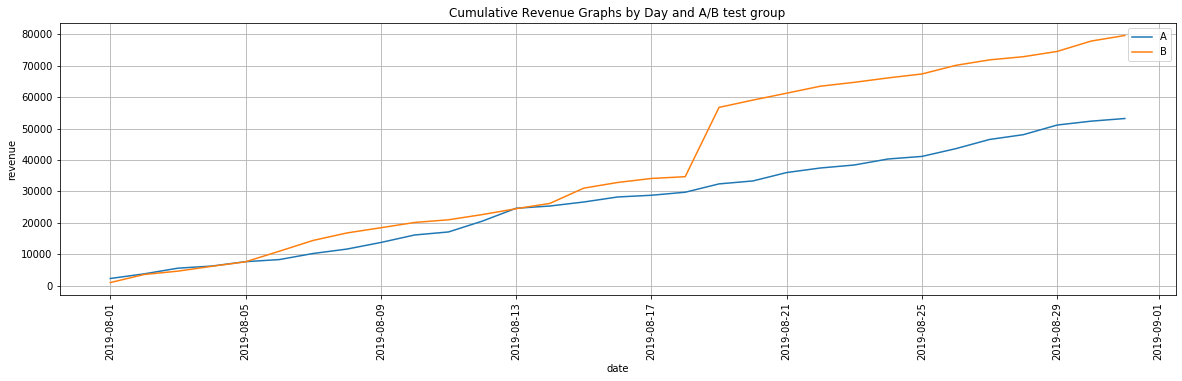

In [16]:
# let's plot cumulative revenue graphs by day and A/B test group:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (20,5))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue Graphs by Day and A/B test group')

plt.xlabel("date")
plt.ylabel("revenue")
plt.legend() 
plt.grid()
plt.xticks(rotation=90)
plt.show()

Revenue is rising steadily throughout the whole test. However, we can see that group B see spikes in revenue at certain point 18-19 Aug'19. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

### 2.2. Cumulative average order size by group (graph) 

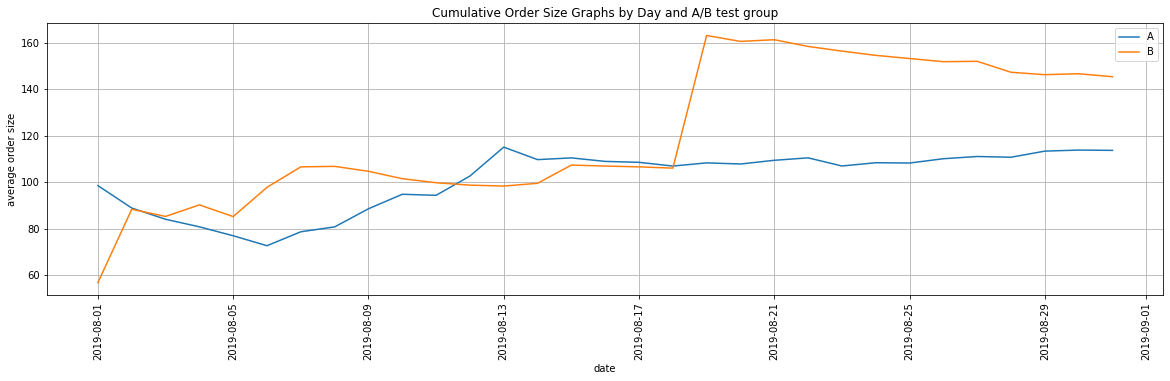

In [17]:
#now let's plot average purchase size by group. We'll divide cumulative revenue by the cumulative number of orders:
plt.figure(figsize = (20,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

plt.title('Cumulative Order Size Graphs by Day and A/B test group')
plt.xlabel("date")
plt.ylabel("average order size")
plt.legend() 
plt.grid()
plt.xticks(rotation=90)
plt.show()

Average purchase size becomes steady by the end of the test, too: it stabilizes for group A and keeps on falling for group B. The spike in group B on the 18 of Aug'19 may have been due to the presence of large, expensive orders.

### 2.3. Relative difference in cumulative average order size for group B compared with group A (graph) 

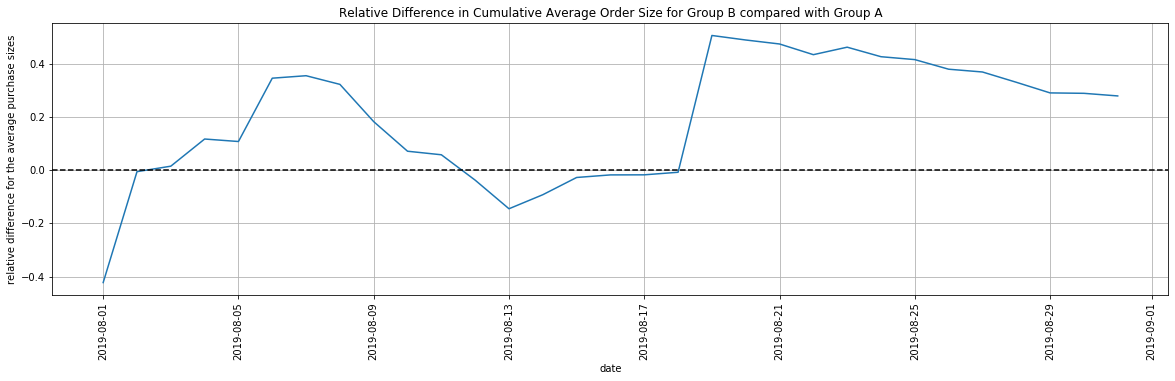

In [18]:
#Let's plot a relative difference graph for the average purchase sizes. 
#We'll add a horizontal axis with the axhline() method (i.e. horizontal line across the axis):
#gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#plotting a relative difference graph for the average purchase sizes
plt.figure(figsize = (20,5))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (
        mergedCumulativeRevenue['revenueB']/
        mergedCumulativeRevenue['ordersB']
    )
    /
    (
        mergedCumulativeRevenue['revenueA']/
        mergedCumulativeRevenue['ordersA']
    )-1
)

#adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Relative Difference in Cumulative Average Order Size for Group B compared with Group A')
plt.xlabel("date")
plt.ylabel("relative difference for the average purchase sizes")
plt.grid()
plt.xticks(rotation=90)
plt.show()

We can see on the graph several points with the difference between the segments spikes. This means there must be some big orders and outliers.

### Part 2.4. Group's conversion rate as the ratio of orders to the number of visits for each day

In [19]:
#let's see the conversion rate for each day
orders_conv=orders_filtered.groupby(
    ['group', 'date',]).agg(
    {'visitorId': pd.Series.nunique,'transactionId': pd.Series.nunique, 'revenue':'sum'}).reset_index().sort_values(by=['date','group'])
orders_conv.columns = ['group', 'date', 'buyers', 'orders', 'revenue']
#orders_conv
conversionData = orders_conv.merge(visits_us, left_on=['date', 'group'], right_on=['date', 'group'])
conversionData['conversion'] = conversionData['buyers'] / conversionData['visits']
conversionData.head(3)

,group,date,buyers,orders,revenue,visits,conversion
0,A,2019-08-01,19,23,2266.6,719,0.026426
1,B,2019-08-01,17,17,967.2,713,0.023843
2,A,2019-08-02,18,19,1468.3,619,0.029079


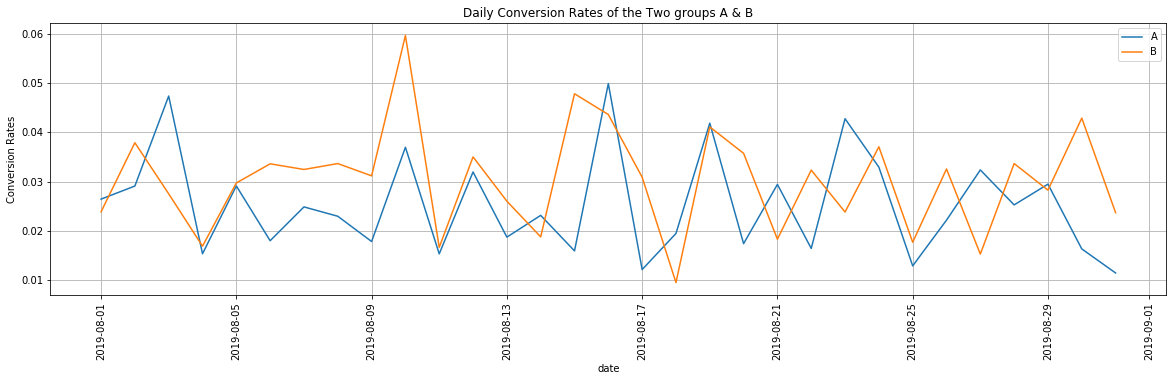

In [20]:
#selecting data on group A 
conversionDataA = conversionData[conversionData['group']=='A']

#selecting data on group B
conversionDataB = conversionData[conversionData['group']=='B']
#plotting the graphs
plt.figure(figsize = (20,5))
plt.plot(conversionDataA['date'], conversionDataA['conversion'], label='A')
plt.plot(conversionDataB['date'], conversionDataB['conversion'], label='B')
plt.legend()
plt.title('Daily Conversion Rates of the Two groups A & B')
plt.xlabel("date")
plt.ylabel("Conversion Rates")
plt.grid()
plt.xticks(rotation=90)
plt.show()

Shortly afyer beginning of the test group B had better daily conversion rate, but after 13 of Aug'19 group B started to lose little by little to group A. At the end, after 25 of Aug'19 group B again started to have better conversion rate than group A.

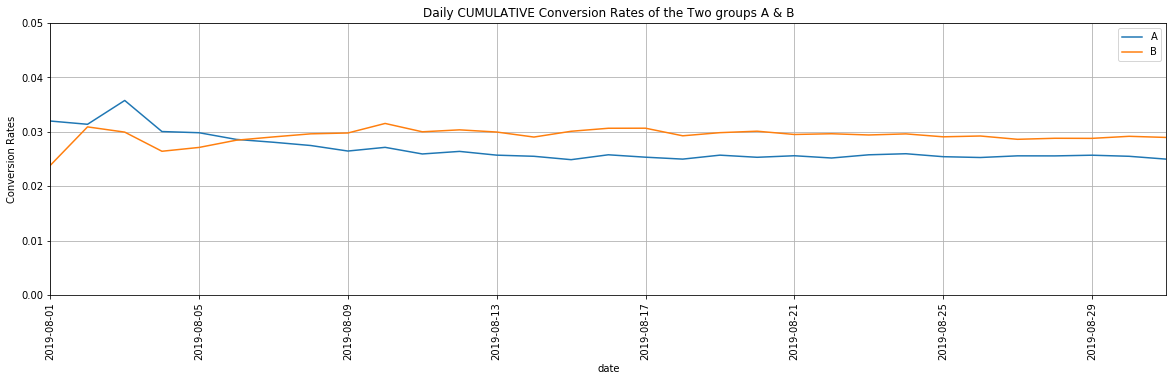

In [21]:
#let's analyze the CUMULATIVE conversion graph 
#let's scale the axes with the plt.axis() method, passing the min and max X axis values and 
#the min and max Y axis values to the method: ["2019-08-01", '2019-08-31', 0, 0.05]

#calculating conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#plotting the graphs
plt.figure(figsize = (20,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Daily CUMULATIVE Conversion Rates of the Two groups A & B')
plt.xlabel("date")
plt.ylabel("Conversion Rates")
plt.grid()
plt.xticks(rotation=90)

#setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.show()

In the beginning of the test group A had better daily CUMULATIVE conversion rate, but after 09 of Aug'19 group B remained with higher daily conversion rate. When we changed the graph's scale we saw that fluctuations at the beginning were higher than at the end.

### 2.5. Number of orders per user (chart)

In [22]:
#Let's find the number of orders per user 
ordersByUsers = orders_filtered.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
print(ordersByUsers.sort_values(by='orders',ascending=False).head(3)) 


      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3


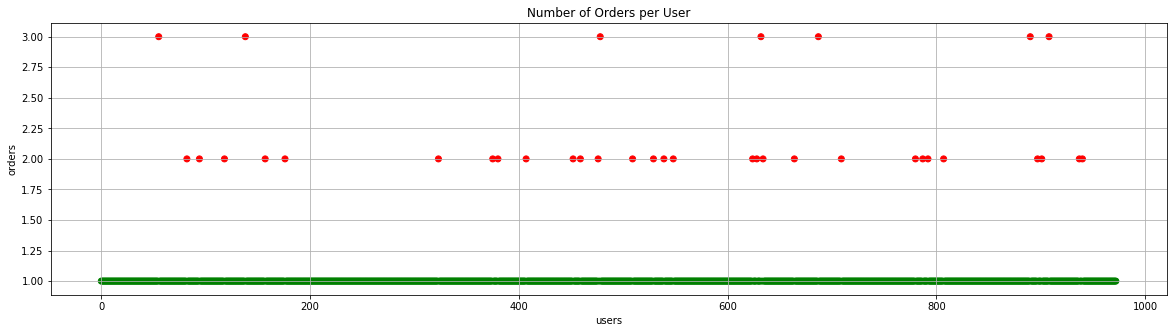

In [23]:
#Let's plot a scatter chart with the number of orders per user
plt.figure(figsize = (20,5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Number of Orders per User')
plt.xlabel("users")
plt.ylabel("orders")

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l>1:
            cols.append('red')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(ordersByUsers['orders'])
plt.scatter(x_values, ordersByUsers['orders'],c=cols) 
plt.grid()
plt.show()

We found that there are several users with two or three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.

### 2.6. 95th and 99th percentiles for the number of orders per user: Defining anomaly

In [24]:
#Let's calculate the 95th and 99th sample percentiles for the number of orders/user
print(np.percentile(ordersByUsers['orders'], [95, 99])) 
#let's be more precize to see how many users are making 2 or 3 orders
print(np.percentile(ordersByUsers['orders'], [95, 97, 99.4])) 


[1. 2.]
[1. 2. 3.]


When checking the 95th and 99th sample percentiles for the number of orders per user, we found that not more than 3% of users placed more than 2 orders, and 0.6% of users made 3.
Thus, it would be reasonable to set one order per user as the lower limit for the number of orders and to filter anomalies on that basis.

### 2.7. Order prices (chart)

In [25]:
orders_filtered_anomaly=orders_filtered.query('revenue <= 2500')
#orders_filtered_anomaly

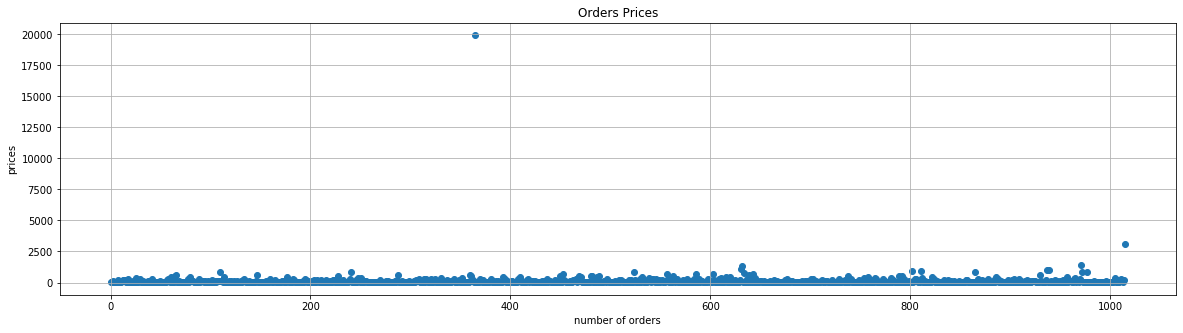

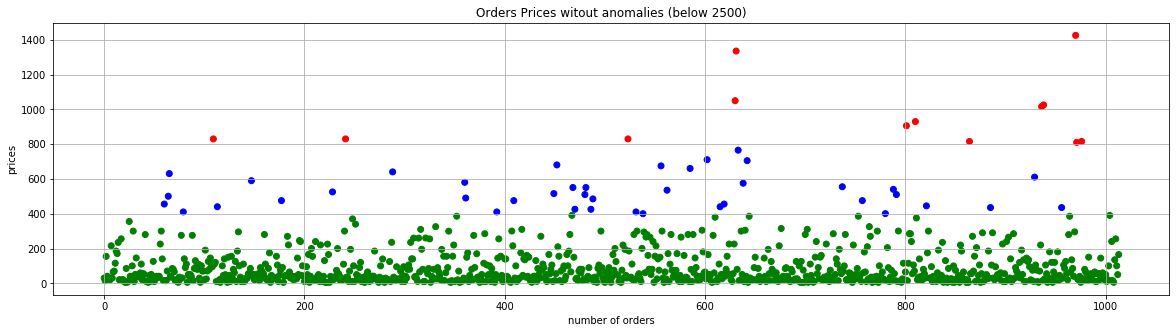

In [26]:
#Let's study data on orders in order to identify outliers 
plt.figure(figsize = (20,5))
x_values = pd.Series(range(0, len(orders_filtered['revenue'])))
plt.scatter(x_values, orders_filtered['revenue']) 
plt.title('Orders Prices')
plt.xlabel("number of orders")
plt.ylabel("prices")
plt.grid()
plt.show()

#let's zoom in and see the orders below 2500
plt.figure(figsize = (20,5))
x_values = pd.Series(range(0, len(orders_filtered_anomaly['revenue'])))
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l>400 and l<800:
            cols.append('blue')
        elif l>=800:
            cols.append('red')
        else:
            cols.append('green')
    return cols
cols=pltcolor(orders_filtered_anomaly['revenue'])
plt.scatter(x_values, orders_filtered_anomaly['revenue'],c=cols)
plt.title('Orders Prices witout anomalies (below 2500)')
plt.xlabel("number of orders")
plt.ylabel("prices")
plt.grid()
plt.show()


While studying data on orders in order to identify outliers, we found several big orders. Based on the graph, we can set the limit for abnormal orders to 2500.

In [27]:
#orders_filtered['revenue'].describe()

### 2.8. 95th and 99th percentiles of order prices: Define anomaly


In [28]:
#Let's calculate the 95th and 99th sample percentiles for the order prices
print(np.percentile(orders_filtered['revenue'], [95, 99])) 


[414.275 830.3  ]


When checking the 95th and 99th sample percentiles for the order prices, we found that not more than 5% of orders has value of more than 414, and 1% of orders brings more than 830. Thus, it would be reasonable to set 415 price per order as the lower limit and to filter anomalies on that basis.

### Testing NULL Hypothesis :

Below we'll test the following H0 and H1 hypotheses :

- H0: The conversion rate of the group B equals to the group A
- H1: The conversion rate of the group B IS NOT equal to the group A 


- H0: The average order size of the group B equals to the group A
- H1: The average order size of the group B IS NOT equal to the group A 

Note: we use the same hypothesises each time sine we are doing same tests for row and filtered data 

### 2.9. Statistical significance of the difference in conversion between the groups using the raw data

Below we'll test the following H0 and H1 hypotheses :

- H0: The conversion rate of the group B equals to the group A
- H1: The conversion rate of the group B IS NOT equal to the group A

aplha = 0.05

Let's find the statistical significance of the difference in conversion between the groups using the raw data - the one after pre-processing (no users who are in A & B groups simultaneously)

Let's create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']
- users with at least one order, we'll indicate the number of orders made


In [29]:
ordersByUsersA = orders_filtered[orders_filtered['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}
                                    )
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_filtered[orders_filtered['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}
                                    )
ordersByUsersB.columns = ['visitorId', 'orders'] 

now let's declare the variables sampleA and sampleB, with users and corresponding numbers of orders
note: who didn't order anything will have 0; this is necessary to prepare the samples for the Mann-Whitney test

thus we'll have two elements:
- list of the number of orders for each user: ordersByUsersA['orders']
- zeroes for users who didn't order anything - the difference between users from visitors and orders tables


In [30]:

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(
            visits_us[visits_us['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])
        ), name='orders'
    )],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(
            visits_us[visits_us['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])
        ), name='orders'
    )],axis=0
) 

Let's apply the criterion and format the p-value by rounding it to three decimal places.

SampleA stores a sample where each element is the number of orders made by a certain user, including zeroes

Thus, the number of sampleA elements is the number of users, and the sum of all the elements is the number of orders
To get the group's conversion rate, we'll need to divide the sum of the orders by the number of users using the mean() method, we'll find the mean for sampleA, then we'll do the same to find conversion rate for group B: sampleB.mean().


In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#to find the relative conversion gain for group B: group B conversion / group A conversion - 1
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.006
0.160


The p-value is considerably lower than 0.05, so we reject the null hypothesis. The row data analysis showed that the group’s conversion rates have statistically significant difference. The relative conversion gain for group B compared with group A is 16%.

### 2.10. Statistical significance of the difference in average order size between the groups using the raw data

Below we'll test the following H0 and H1 hypotheses :

- H0: The average order size of the group B equals to the group A
- H1: The average order size of the group B IS NOT equal to the group A

aplpha = 0.05

In [32]:
##let's find the statistical significance of the difference in average order size between the groups  
#let's pass the data on revenue to the mannwhitneyu() criterion
print("{0:.3f}".format(
    stats.mannwhitneyu(
        orders_filtered[orders_filtered['group']=='A']['revenue'], 
        orders_filtered[orders_filtered['group']=='B']['revenue'])[1]
)
     )
#let's find the relative difference in average order size between the groups
print("{0:.3f}".format(
    orders_filtered[orders_filtered['group']=='B']['revenue'].mean()/
    orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1
)
     )

0.431
0.278


While cheking the statistical significance of the difference in average order size between the groups, we found that our p-value is greater than 0.05, so there are no statistically significant differences between the groups’ average order size. But the relative difference is ~28%. 

### 2.11. Statistical significance of the difference in conversion between the groups using the filtered data

Below we'll test the following H0 and H1 hypotheses for filtered data:

- H0: The conversion rate of the group B equals to the group A
- H1: The conversion rate of the group B IS NOT equal to the group A

aplha = 0.05

Let's calculate the statistical significance of the differences in conversion between the groups, using filtered data. 

First, we'll define anomalous users as those who place more than one order (section 2.5 above) or an order bigger than 2,500 (section 2.7 above).

Thus we'll remove the 3% of users with the largest numbers of orders usersWithManyOrders and less than 1% of the users with the most expensive orders usersWithExpensiveOrders, we'll join them in a table called abnormalUsers and find the total number of anomalous users.


In [33]:

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], 
     ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_filtered[orders_filtered['revenue'] >=2500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

33    249864742
36    366673373
51    406208401
67    522292794
58    611059232
Name: visitorId, dtype: int64
(38,)


In [34]:
#then, let's prepare samples of the number of orders per user for each test group

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits_us[visits_us['group']=='A']['visits'].sum() - 
                                  len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits_us[visits_us['group']=='B']['visits'].sum() - 
                                  len(ordersByUsersB['orders'])),name='orders')],axis=0) 


In [35]:
#let's apply the statistical Mann-Whitney criterion to the resulting samples
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#to find the relative conversion gain for group B: group B conversion / group A conversion - 1
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.006
0.178


The results for conversion with filtered anomalies is not that different from the row data. The p-value is  0.005 vs 0.006, still lower than 0.5, so we reject the null hypothesis. 
The filtered anomalies data analysis showed that the group’s conversion rates still have statistically significant difference. The relative conversion gain for group B compared with group A is 18 % (vs 16% for the row data).

### 2.12. Statistical significance of the difference in average order size between the groups using the filtered data

In [36]:
#the results for conversion almost didn't change
#let's see what happens to the values for average order size using filtered data

print("{0:.3f}".format(stats.mannwhitneyu(
    orders_filtered[np.logical_and(
        orders_filtered['group']=='A',
        np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_filtered[np.logical_and(
        orders_filtered['group']=='B',
        np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders_filtered[np.logical_and(
        orders_filtered['group']=='B', 
        np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_filtered[np.logical_and(
        orders_filtered['group']=='A',
        np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.425
-0.066


While cheking the statistical significance of the difference in average order size between the groups for data without anomalies, we found that our p-value is greater than 0.05, so there are no statistically significant differences between the groups’ average order size (same as for row data). But the relative difference is negative -7% (vs ~28% for the row data).

### 2.13. Conclusion



What conclusions can we draw from this test?
Here are the facts:
- Both raw nor filtered data revealed any statistically significant differences in conversion between the groups.
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
- When we saw the graph, it showed the difference in conversion between the groups where group B's results were better
- The graph showing the difference in average order size between the groups tells us that group B's results are better as well

Based on these facts, we can conclude that the test is successful and should be stopped. Group B is the leader based on this research. A probability that segment A will become better than segment A is pretty low. 


## General Conclusion



In the present paper, we have a research for an online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenues.
In the present research we will prioritize these hypotheses, launch an A/B test, and analyze the results.

There are 3 data sets. Every data set is saved as a variable:

**hypotheses_us**

Its total length is 9 rows, every row represents one Hypotheses and its characteristics in columns: Hypotheses — brief descriptions of the hypotheses; Reach — user reach, on a scale of one to ten; Impact — impact on users, on a scale of one to ten; Confidence — confidence in the hypothesis, on a scale of one to ten; Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

**orders_us**

Its total length is 1197 rows, every row represents one order and its characteristics in columns: transactionId — order identifier; visitorId — identifier of the user who placed the order; date — of the order; revenue — from the order; group — the A/B test group that the user belongs to.

**visits_us**

Its total length is 62 rows, every row represents one visit and its characteristics in columns: date — date; group — A/B test group; visits — the number of visits on the date specified in the A/B test group specified.

    
As part of out analysis, in the order_us table, we made sure each visitor belongs to 1 group and in filtered data we got the following:

- A group sample size: 468
- B group sample size: 548

Although aligned A and B distributions to one size increases the power of the test, thus its accuracy,  it was decided not to use it as we have pretty large data set and distributions are more or less the same.

As we mentioned earlier, hypotheses_us contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. It's a common situation: testing a hypothesis will cost a lot of money, but our resources are limited. So we need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, the hypotheses formulated in the table have to be prioritized. When we applied the ICE framework to prioritize hypothesis we found that hypothesis 8 was the most promising one followed by hypothesis 0, 7, and 6. We applied the RICE framework to prioritize hypothesis and found that hypothesis 7 was the most promising one followed by hypothesis 2, 0 and 6. Thus, the priorities were as follos: first test the hypothesis 7, then 0 and 6:

- Add a subscription form to all the main pages (7)
- Add two new channels for attracting traffic (0)
- Show banners with current offers and sales on (6)

Then, we conducted A/B tests and found that revenues are rising steadily throughout the whole test. However, we can see that group B see spikes in revenue at certain point 18-19 Aug'19. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.

While checking the average purchase size, we saw that it becomes steady by the end of the test: it stabilizes for group A and keeps on falling for group B (after a good rize due to a spike). This spike in group B (after which B becomes a leader) on the 18 of Aug'19 may have been due to the presence of large, expensive orders.

In the same time on the graph we saw several points with the difference between the segments spikes. This means there must be some big orders and outliers.

In the beginning of the test group A had better daily CUMULATIVE conversion rate, but after 09 of Aug'19 group B remained with higher daily conversion rate. When we changed the graph's scale we saw that fluctuations at the beginning were higher than at the end.

When checking the number of orders, we found that there are several users with two or three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not. When checking the 95th and 99th sample percentiles for the number of orders per user, we found that not more than 3% of users placed more than 2 orders, and 0.6% of users made 3. Thus, it would be reasonable to set one order per user as the lower limit for the number of orders and to filter anomalies on that basis.

While studying data on orders in order to identify outliers, we found several big orders. Based on the graph, we can set the limit for abnormal orders between 2,500 and 20,000. When checking the 95th and 99th sample percentiles for the order prices, we found that not more than 5% of orders has value of more than 414, and 1% of orders brings more than 830. Thus, it would be reasonable to set 415 price per order as the lower limit and to filter anomalies on that basis.

While testing NULL hypothesis we said the following:
- H0: The conversion rate of the group B equals to the group A 
- H1: The conversion rate of the group B IS NOT equal to the group A

- H0: The average order size of the group B equals to the group A 
- H1: The average order size of the group B IS NOT equal to the group A
Note: we use the same hypothesises each time sine we are doing same tests for row and filtered data.

We were testing statistical significance of the difference in **conversion** between the groups using the raw data (the data after pre-processing - users in both groups filtered out), we found that the p-value is considerably lower than 0.05, so we rejected the null hypothesis. Thus, the row data analysis showed that the group’s conversion rates have statistically significant difference. The relative conversion gain for group B compared with group A was 16%.

While checking the statistical significance of the difference in **average order size** between the groups, we found that our p-value is greater than 0.05, so there were no statistically significant differences between the groups’ average order size (accepting null hypothesis). The relative difference was ~28%.

Then we filtered out anomalies. First, we defined anomalous users as those who place more than one order (based on calculations in section 2.5) or an order bigger than 2,500 (based on calculation in section 2.7). Thus we removed the 3% of users with the largest numbers of orders and less than 1% of the users with the most expensive orders. 

The results for **conversion** with filtered anomalies was not that different from the row data. The p-value was almost the same 0.005 vs 0.006, still lower than 0.5, so we rejected the null hypothesis, means the filtered anomalies data analysis showed that the group’s conversion rates still had statistically significant difference. The relative conversion gain for group B compared with group A was 17 % (vs 16% for the row data).

While checking the statistical significance of the difference in **average order size** between the groups for data without anomalies, we found that our p-value is greater than 0.05, so there were no statistically significant differences between the groups’ average order size (same as for row data). The relative difference is negative -7% (vs ~28% for the row data).

In summary:

- Both raw nor filtered data revealed any statistically significant differences in conversion between the groups
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups
- When we saw the graph, it showed the difference in conversion between the groups where group B's results were better
- The graph showing the difference in average order size between the groups tells us that group B's results are better as well

Based on these facts, we can conclude that **the test is successful and should be stopped. Group B is the leader based on this research. A probability that segment A will become better than segment A is pretty low**. 
